In [1]:
RooWorkspace w("w");
// define a Gaussian pdf
w.factory("Gaussian:g(x[-5,5],mu[0,-10,10],sigma[1,0,1000])");
// create extend pdf with number of events
w.factory("ExtendPdf:model(g,nevt[100,0,100000])");   

RooAbsPdf * pdf = w.pdf("model");   // access object from workspace
RooRealVar * x = w.var("x");   // access object from workspace


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [ ]:
RooPlot * pl = nullptr;

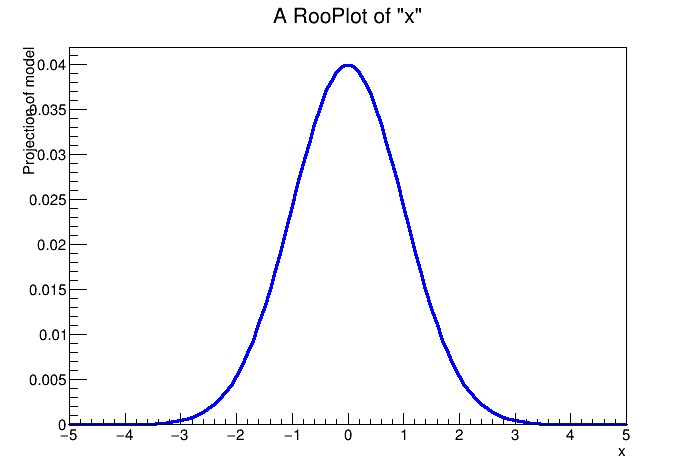

In [9]:
pl = x->frame(); 
pdf->plotOn(pl);
pl->Draw(); c1->Draw();

In [7]:
pdf->Print("t")

0x5d0e730 RooExtendPdf::model = 1 [Auto,Dirty] 
  0x5ce88d0/V- RooGaussian::g = 1 [Auto,Dirty] 
    0x3079460/V- RooRealVar::x = 0
    0x5ce5c60/V- RooRealVar::mu = 0
    0x5ce64b0/V- RooRealVar::sigma = 1
  0x5cf05b0/V- RooRealVar::nevt = 100


Create the data set by generating first 1000 data points. We do not bin the data 

In [10]:
RooDataSet * data = nullptr;

In [11]:
data = pdf->generate(*x, 1000);

We plot the data points. FOr plotting the data are binned in a default number of bins (100) which is defined in the RooRealVar object. Use x.setBins(50) to change the number of bins.

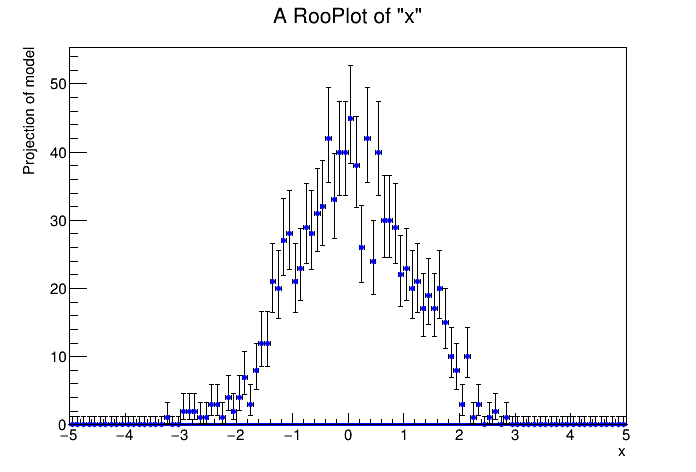

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 1000 will supercede previous event count of 1 for normalization of PDF projections


In [12]:
data->plotOn(pl); 
pl->Draw(); c1->Draw();

Now we fit the data set and store the result in a RooFitResult class. We use Minuit2 for the minimization

In [13]:
 RooFitResult * res = nullptr;

In [14]:
res = pdf->fitTo(*data, RooFit::Minimizer("Minuit2","Migrad"), RooFit::Save(1) ); 

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
MnSeedGenerator: for initial parameters FCN = -3059.217117442
MnSeedGenerator: Initial state:   - FCN =  -3059.217117442 Edm =      737.843 NCalls =     13
VariableMetric: start iterating until Edm is < 0.001
VariableMetric: Initial state   - FCN =  -3059.217117442 Edm =      737.843 NCalls =     13
VariableMetric: Iteration #   0 - FCN =  -3059.217117442 Edm =      737.843 NCalls =     13
VariableMetric: Iteration #   1 - FCN =  -4458.383216018 Edm =      3.86624 NCalls =     26
VariableMetric: Iteration #   2 - FCN =  -4463.624438917 Edm =     0.127244 NCalls =     34
VariableMetric: Iteration #   3 - FCN =  -4463.818944263 Edm =    0.0135627 NCalls =     42
VariableMetric: Iteration #   4 - FCN =  -4463.835157438 Edm

Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate


In [15]:
res->Print()


  RooFitResult: minimized FCN value: -4463.84, estimated distance to minimum: 0.000195913
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                    mu    5.2884e-02 +/-  3.24e-02
                  nevt    9.9998e+02 +/-  3.16e+01
                 sigma    1.0249e+00 +/-  2.29e-02



We plot now the fitted function and its resulting parameter values

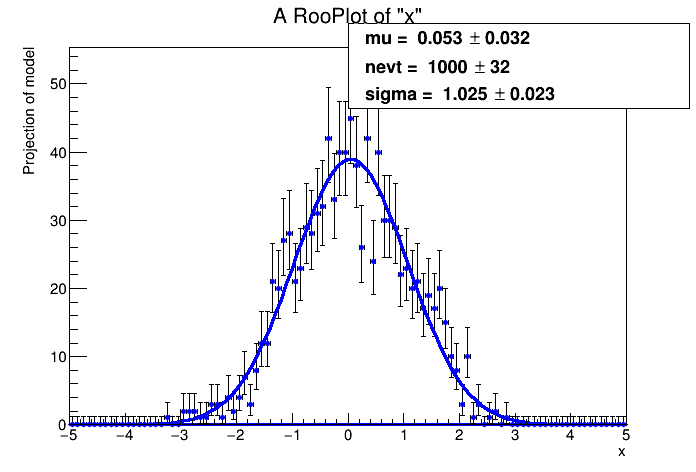

In [16]:
pdf->plotOn(pl);
pdf->paramOn(pl);
pl->Draw(); 
c1->Draw();             

We save now the workspace in a file

In [17]:
w.writeToFile("GaussianModel.root", true);